https://arxiv.org/abs/1905.10876

In [1]:
from qiskit.quantum_info.states.random import random_statevector
from qutip import *
from qiskit import QuantumCircuit,execute,Aer
from qiskit.circuit import ParameterVector
from math import pi
import numpy as np
import pandas as pd

### Bloch Sphere and random statevector

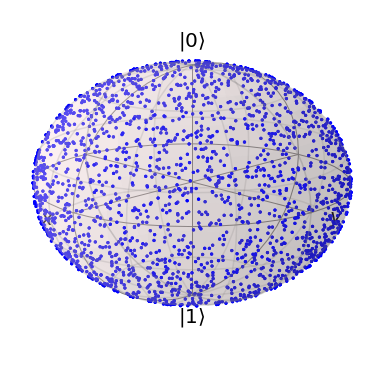

In [2]:
b = Bloch()
b.point_color=['b']
b.point_marker=['o']
b.point_size=[5]      
b.view=[-45,15]
phi_list=[]
for i in range(2000):
    phi=random_statevector(dims=2).data
    aa=Qobj(phi)
    phi_list.append(aa)
b.add_states(phi_list,kind='point')   
b.show()    

### Qiskit Result and Some Setting

In [3]:
backend = Aer.get_backend('statevector_simulator') 
def state_result(circ):
    out_state=execute(circ,backend).result().get_statevector()
    return out_state

In [4]:
num_bins=75

In [5]:
# KL divergence

from math import log2

def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

### Circuit A

In [6]:
def circuit_a(theta):
    ac=QuantumCircuit(1)
    ac.h(0)
    ac.rz(theta,0)
    return ac

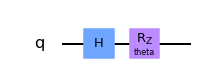

In [7]:
circuit_a('theta').draw('mpl')

In [8]:
theta_1=np.random.uniform(low=0,high=2*pi,size=5000)
theta_2=np.random.uniform(low=0,high=2*pi,size=5000)

In [9]:
fidelity_a=[]
a_result1=[]
a_result2=[]
for i in range(len(theta_1)):
    theta1=theta_1[i]
    theta2=theta_2[i]
    circ1_state=state_result(circuit_a(theta1))
    a_result1.append(circ1_state)
    circ2_state=state_result(circuit_a(theta2))
    a_result2.append(circ2_state)
    fidelity_a.append(abs(circ1_state.dot(circ2_state.conjugate()))**2)

In [10]:
fid_a=pd.DataFrame(fidelity_a,columns=['Fidelity'])

In [11]:
a_frequency=pd.DataFrame(fid_a['Fidelity'].value_counts(bins=num_bins,sort=False,normalize=True))
a_frequency['Harr']=1/num_bins

<AxesSubplot:>

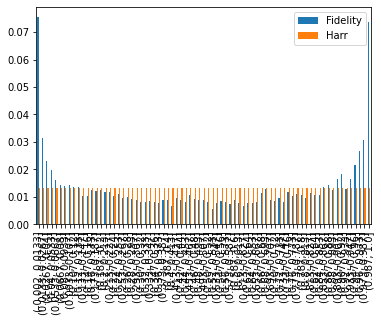

In [12]:
a_frequency.plot(kind='bar')

In [13]:
a_frequency

,Fidelity,Harr
"(-0.002, 0.0133]",0.0754,0.013333
"(0.0133, 0.0267]",0.0314,0.013333
"(0.0267, 0.04]",0.0232,0.013333
"(0.04, 0.0533]",0.0198,0.013333
"(0.0533, 0.0667]",0.0162,0.013333
...,...,...
"(0.933, 0.947]",0.0164,0.013333
"(0.947, 0.96]",0.0216,0.013333
"(0.96, 0.973]",0.0268,0.013333
"(0.973, 0.987]",0.0306,0.013333


In [14]:
pa=np.array(a_frequency['Fidelity'])
qa=np.array(a_frequency['Harr'])

In [15]:
kl_divergence(pa,qa)

0.299308356508581

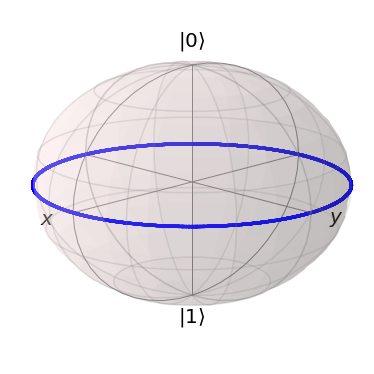

In [16]:
b = Bloch()
b.point_color=['b']
b.point_marker=['o']
b.point_size=[5]      
b.view=[-45,15]
phi_list=[]
for i in range(len(a_result1)):
    phi=a_result1[i]
    aa=Qobj(phi)
    phi_list.append(aa)
b.add_states(phi_list,kind='point')   
b.show() 

#### Haar Test

In [17]:
data_haar=[]
for i in range(len(theta_1)):
    a=random_statevector(dims=2)
    b=random_statevector(dims=2)
    data_haar.append(abs(a.data.dot(b.data.conjugate()))**2)

In [18]:
fid_Haar=pd.DataFrame(data_haar,columns=['Fidelity'])

In [19]:
fid_Haar

,Fidelity
0,0.883612
1,0.390547
2,0.566804
3,0.622208
4,0.807525
...,...
4995,0.443930
4996,0.775053
4997,0.615611
4998,0.202386


In [21]:
Haar_frequency=pd.DataFrame(fid_Haar['Fidelity'].value_counts(bins=num_bins,sort=False,normalize=True))

In [22]:
Haar_frequency

,Fidelity
"(-0.0016250000000000001, 0.0137]",0.0146
"(0.0137, 0.027]",0.0146
"(0.027, 0.0404]",0.0120
"(0.0404, 0.0537]",0.0134
"(0.0537, 0.067]",0.0156
...,...
"(0.933, 0.947]",0.0110
"(0.947, 0.96]",0.0124
"(0.96, 0.973]",0.0112
"(0.973, 0.987]",0.0112


In [24]:
phaar=np.array(a_frequency['Fidelity'])
qhaar=np.array(Haar_frequency['Fidelity'])

In [25]:
kl_divergence(phaar,qhaar)

0.2938838511045231

### Circuit B

In [26]:
def circuit_b(theta):
    bc=QuantumCircuit(1)
    bc.h(0)
    bc.rz(theta[0],0)
    bc.rx(theta[1],0)
    return bc

In [27]:
theta_b1=[]
theta_b2=[]
for i in range(5000):
    theta_b1.append((np.random.uniform(low=0,high=2*pi,size=2)))
    theta_b2.append((np.random.uniform(low=0,high=2*pi,size=2)))

In [28]:
data_bin=[]
b_result1=[]
b_result2=[]
for i in range(len(theta_b1)):
    theta1=theta_b1[i]
    theta2=theta_b2[i]
    circ1_state=state_result(circuit_b(theta1))
    b_result1.append(circ1_state)
    circ2_state=state_result(circuit_b(theta2))
    b_result2.append(circ2_state)
    data_bin.append(abs(circ1_state.dot(circ2_state.conjugate()))**2)

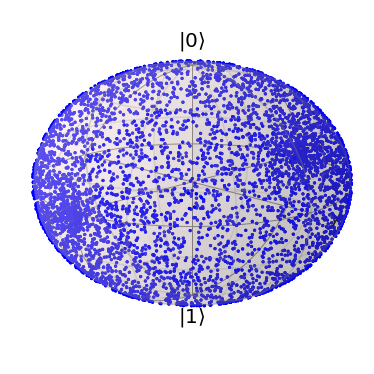

In [29]:
b = Bloch()
b.point_color=['b']
b.point_marker=['o']
b.point_size=[5]      
b.view=[-45,15]
phi_list=[]
for i in range(len(b_result1)):
    phi=b_result1[i]
    aa=Qobj(phi)
    phi_list.append(aa)
b.add_states(phi_list,kind='point')   
b.show() 

In [30]:
fid_b=pd.DataFrame(data_bin,columns=['Fidelity'])

In [31]:
b_frequency=pd.DataFrame(fid_b['Fidelity'].value_counts(bins=num_bins,sort=False,normalize=True))
b_frequency['Harr']=1/num_bins

<AxesSubplot:>

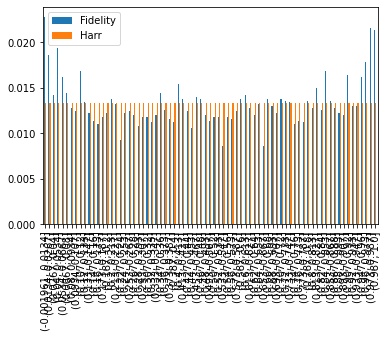

In [32]:
b_frequency.plot(kind='bar')

In [33]:
b_frequency

,Fidelity,Harr
"(-0.001961, 0.0134]",0.0228,0.013333
"(0.0134, 0.0267]",0.0186,0.013333
"(0.0267, 0.04]",0.0142,0.013333
"(0.04, 0.0534]",0.0194,0.013333
"(0.0534, 0.0667]",0.0162,0.013333
...,...,...
"(0.933, 0.947]",0.0130,0.013333
"(0.947, 0.96]",0.0162,0.013333
"(0.96, 0.973]",0.0178,0.013333
"(0.973, 0.987]",0.0216,0.013333


In [34]:
pb=np.array(b_frequency['Fidelity'])
qb=np.array(b_frequency['Harr'])

In [35]:
kl_divergence(pb,qb)

0.02628744011889773

### Arbitrary Unitary 

In [36]:
def unitart_circ(theta):
    qc=QuantumCircuit(1)
    qc.u3(theta[0],theta[1],theta[2],0)
    return qc

In [37]:
theta_u1=[]
theta_u2=[]
for i in range(5000):
    theta_u1.append((np.append(np.random.uniform(low=0,high=pi,size=1),(np.random.uniform(low=0,high=2*pi,size=2)))))
    theta_u2.append((np.append(np.random.uniform(low=0,high=pi,size=1),(np.random.uniform(low=0,high=2*pi,size=2)))))

In [38]:
data_uin=[]
plot_pts=[]
u_result1=[]
u_result2=[]
for i in range(len(theta_u1)):
    theta1=theta_u1[i]
    theta2=theta_u2[i]
    circ1_state=state_result(unitart_circ(theta1))
    u_result1.append(circ1_state)
    circ2_state=state_result(unitart_circ(theta2)) 
    u_result2.append(circ2_state)
    data_uin.append(abs(circ1_state.dot(circ2_state.conjugate()))**2)

In [39]:
fid_u=pd.DataFrame(data_uin,columns=['Fidelity'])

In [40]:
u_frequency=pd.DataFrame(fid_u['Fidelity'].value_counts(bins=num_bins,sort=False,normalize=True))
u_frequency['Harr']=1/num_bins

<AxesSubplot:>

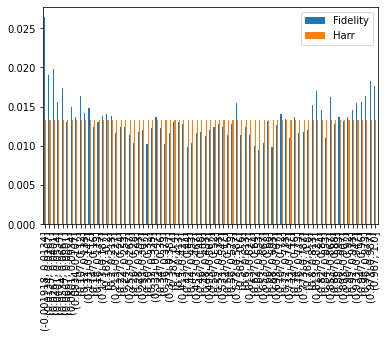

In [41]:
u_frequency.plot(kind='bar')

In [42]:
u_frequency

,Fidelity,Harr
"(-0.001918, 0.0134]",0.0264,0.013333
"(0.0134, 0.0267]",0.0190,0.013333
"(0.0267, 0.0401]",0.0198,0.013333
"(0.0401, 0.0534]",0.0156,0.013333
"(0.0534, 0.0667]",0.0174,0.013333
...,...,...
"(0.933, 0.947]",0.0154,0.013333
"(0.947, 0.96]",0.0156,0.013333
"(0.96, 0.973]",0.0164,0.013333
"(0.973, 0.987]",0.0182,0.013333


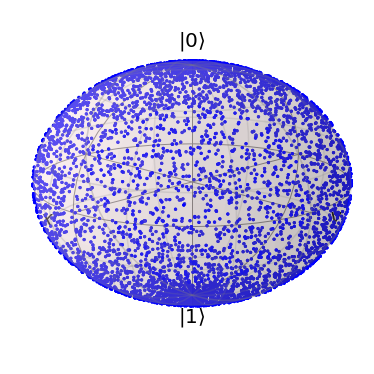

In [43]:
b = Bloch()
b.point_color=['b']
b.point_marker=['o']
b.point_size=[5]      
b.view=[-45,15]
phi_list=[]
for i in range(len(u_result1)):
    phi=u_result1[i]
    aa=Qobj(phi)
    phi_list.append(aa)
b.add_states(phi_list,kind='point')   
b.show() 

In [44]:
pu=np.array(u_frequency['Fidelity'])
qu=np.array(u_frequency['Harr'])

In [45]:
kl_divergence(pu,qu)

0.026672925781345877